# Advanced Tutorial on Attention Mechanisms with PyTorch and Hugging Face

## Introduction
In this advanced tutorial, we'll explore the intricacies of attention mechanisms, a cornerstone technology in modern natural language processing (NLP) and beyond. We'll dive into the theoretical underpinnings, then implement and visualize attention mechanisms using PyTorch and Hugging Face's Transformers library. This guide is designed for those with a solid foundation in machine learning and PyTorch, aiming to deepen understanding and practical skills in applying attention in NLP tasks.

## Setup
First, ensure you're working in a Python environment with PyTorch and Hugging Face's Transformers installed. This tutorial is designed to be compatible with Google Colab notebooks.

In [1]:
!pip install -q torch torchvision torchaudio
!pip install -q transformers

## Checking Package Versions
To ensure reproducibility, let's check the versions of the key packages used in this tutorial.

In [2]:
import torch
import transformers
print(f"PyTorch Version: {torch.__version__}")
print(f"Transformers Version: {transformers.__version__}")

PyTorch Version: 2.1.0+cu121
Transformers Version: 4.38.1


## Understanding Attention Mechanisms
Attention mechanisms enable models to focus on different parts of the input sequence when performing a task, mimicking cognitive attention in humans. This capability has significantly improved performance in tasks such as machine translation, text summarization, and question-answering.

## Theoretical Background
At its core, attention is calculated using three components: queries, keys, and values. The attention scores are computed by measuring the similarity between queries and keys, often using dot-product or scaled dot-product attention. These scores are then used to create a weighted sum of values, which represents the output of the attention mechanism.

## Self-Attention and Transformers
Self-attention, a variant of attention, allows inputs to interact with each other ("self") and find out who they should pay more attention to. The Transformer model, introduced in the paper "Attention is All You Need", relies entirely on self-attention mechanisms to process data.

## More Details


### Scaled Dot-Product Attention

The scaled dot-product attention is a core component of the Transformer architecture, enabling it to dynamically focus on different parts of the input sequence. It operates on queries $Q$, keys $K$, and values $V$, which are all vectors produced by linearly transforming the input embeddings. The attention mechanism computes the dot products of the query with all keys, divides each by $\sqrt{d_k}$ (where $d_k$ is the dimensionality of the keys and queries), and applies a softmax function to obtain the weights on the values.

### Mathematical Formulation

Given a set of queries $Q$, keys $K$, and values $V$, the scaled dot-product attention output is calculated as:

$$ \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V $$

- $QK^T$ represents the matrix multiplication of the queries and the transpose of the keys, providing a measure of similarity between each query and all keys.
- $\sqrt{d_k}$ is a scaling factor to prevent the softmax function from entering regions where it has extremely small gradients, improving stability. It's the square root of the key/query dimensionality.
- The softmax function is applied to ensure the weights sum up to 1, allowing them to be interpreted as probabilities.

### Transformer Model Overview

The Transformer model, introduced by Vaswani et al. in "Attention is All You Need," revolutionized natural language processing by relying entirely on attention mechanisms, dispensing with recurrence and convolutions. It consists of an encoder and a decoder, each comprising multiple layers that perform various functions, including self-attention, feed-forward neural networks, and layer normalization.

### Encoder

The encoder maps an input sequence of symbol representations $(x_1, ..., x_n$) to a sequence of continuous representations $z = (z_1, ..., z_n)$. Each layer in the encoder consists of two sub-layers: a multi-head self-attention mechanism and a simple, position-wise fully connected feed-forward network.

Mathematically, for each layer, the operations can be described as follows:

1. **Multi-Head Self-Attention:** Allows the model to focus on different positions of the input sequence. It's an extension of the scaled dot-product attention and is calculated as:

   $$ \text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, ..., \text{head}_h)W^O $$

   where $ \text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V) $

   Here, $W_i^Q$, $W_i^K$, and $W_i^V$ are parameter matrices for the $i$-th attention head, and $W^O$ is the output linear transformation matrix.

2. **Position-wise Feed-Forward Networks:** A fully connected feed-forward network is applied to each position separately and identically. This consists of two linear transformations with a ReLU activation in between:

   $$ \text{FFN}(x) = \max(0, xW_1 + b_1)W_2 + b_2 $$

   where $W_1$, $W_2$, $b_1$, and $b_2$ are parameters of the linear transformations.

### Decoder

The decoder is also composed of a series of layers that generate the output sequence. Each layer in the decoder includes three sub-layers: a multi-head self-attention mechanism, a multi-head attention mechanism over the encoder's output, and a position-wise feed-forward network. The self-attention mechanism in the decoder is modified to prevent positions from attending to subsequent positions, ensuring that the predictions for position $i$ can depend only on the known outputs at positions less than $i$.

### Putting It All Together

The Transformer combines these components in a novel architecture that processes data in parallel and captures complex dependencies, significantly improving upon previous models for tasks like machine translation, text summarization, and more.

This detailed explanation, complete with mathematical formulations, provides a comprehensive overview of the scaled dot-product attention mechanism and the Transformer model's architecture. You can use this as part of your advanced tutorial documentation in Google Colab notebooks, providing readers with a deep understanding of these pivotal technologies in modern NLP.




## Implementing Attention with PyTorch
Let's implement a basic version of the scaled dot-product attention mechanism in PyTorch.##

In [21]:
import torch.nn.functional as F

def scaled_dot_product_attention(query, key, value):
    matmul_qk = torch.matmul(query, key.transpose(-2, -1))
    d_k = query.size(-1)
    # Correct approach: Create a tensor of d_k for sqrt operation
    scaled_attention_logits = matmul_qk / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
    attention_weights = F.softmax(scaled_attention_logits, dim=-1)
    output = torch.matmul(attention_weights, value)
    return output, attention_weights

## Visualizing Attention
Visualizing attention weights can provide insights into how models make decisions. Let's use matplotlib to create a function that visualizes the attention weights between inputs in a sequence.

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_attention(attention, sentence, predicted_sentence):
    fig, ax = plt.subplots(figsize=(5,5))
    attention = attention.squeeze().detach().cpu().numpy()
    ax.matshow(attention, cmap='viridis')
    ax.set_xticklabels([''] + sentence, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence)
    plt.show()


## Integrating Attention Functions into a Practical Example
### Step 1: Implementing a Simple Transformer Block
First, let's implement a simple Transformer block that uses our scaled_dot_product_attention function. This example will help illustrate how attention mechanisms are applied within the Transformer architecture.



In [23]:
import torch
import torch.nn as nn

class SimpleTransformerBlock(nn.Module):
    def __init__(self, emb_size, heads):
        super(SimpleTransformerBlock, self).__init__()
        self.multi_head_attention = MultiHeadAttention(emb_size, heads)
        self.norm1 = nn.LayerNorm(emb_size)
        self.norm2 = nn.LayerNorm(emb_size)
        self.ff = nn.Sequential(
            nn.Linear(emb_size, 4 * emb_size),
            nn.ReLU(),
            nn.Linear(4 * emb_size, emb_size)
        )

    def forward(self, value, key, query):
        attention_output, attention_weights = self.multi_head_attention(query, key, value)
        x = self.norm1(attention_output + query)
        forward = self.ff(x)
        return self.norm2(forward + x), attention_weights

class MultiHeadAttention(nn.Module):
    def __init__(self, emb_size, heads):
        super(MultiHeadAttention, self).__init__()
        self.emb_size = emb_size
        self.heads = heads
        self.head_dim = emb_size // heads

        assert self.head_dim * heads == emb_size, "Embedding size not divisible by number of heads"

        self.values = nn.Linear(emb_size, emb_size, bias=False)
        self.keys = nn.Linear(emb_size, emb_size, bias=False)
        self.queries = nn.Linear(emb_size, emb_size, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, emb_size)

    def forward(self, value, key, query):
        N = query.shape[0]
        value_len, key_len, query_len = value.shape[1], key.shape[1], query.shape[1]

        # Split the embedding into self.heads pieces for queries, keys, and values
        # And apply the corresponding linear transformation
        queries = self.queries(query).view(N, query_len, self.heads, self.head_dim)
        keys = self.keys(key).view(N, key_len, self.heads, self.head_dim)
        values = self.values(value).view(N, value_len, self.heads, self.head_dim)

        # Permute for the computation to match the expected input of scaled_dot_product_attention
        queries = queries.permute(0, 2, 1, 3)
        keys = keys.permute(0, 2, 1, 3)
        values = values.permute(0, 2, 1, 3)

        # Call scaled_dot_product_attention
        attention, attention_weights = scaled_dot_product_attention(queries, keys, values)

        # Concatenate heads and put through final linear layer
        attention = attention.permute(0, 2, 1, 3).contiguous().view(N, query_len, self.emb_size)
        output = self.fc_out(attention)

        return output, attention_weights


### Step 2: Visualizing Attention Weights
Now, let's simulate a scenario where we can visualize the attention weights. We'll create a mock dataset and pass it through our SimpleTransformerBlock to get the attention weights.

<ipython-input-22-a8ad044d13e7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, rotation=90)
<ipython-input-22-a8ad044d13e7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence)


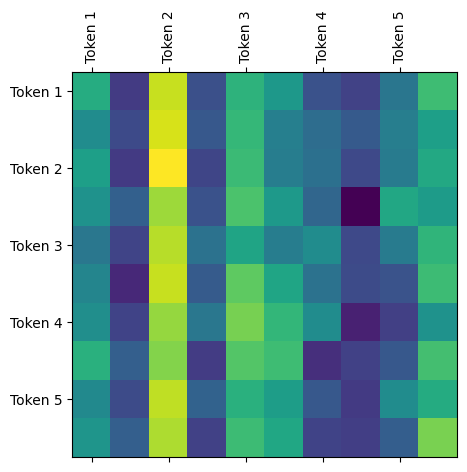

In [28]:
# Mock input (batch size, sequence length, embedding dimension)
mock_data = torch.rand(1, 10, 512)  # A batch with 1 item, 10 sequence length, 512 embedding size

# Initialize our simple Transformer block
transformer_block = SimpleTransformerBlock(emb_size=512, heads=8)

# Forward pass through the transformer block
output, attention_weights = transformer_block(mock_data, mock_data, mock_data)

# Extract the attention weights for the first head of the first item in the batch
first_head_attention_weights = attention_weights[0, 0, :, :]  # Shape: [10, 10]

# Ensure the extracted attention weights are in the correct 2D shape for visualization
plot_attention(first_head_attention_weights,
               sentence=["Token {}".format(i) for i in range(1, 11)],
               predicted_sentence=["Token {}".format(i) for i in range(1, 11)])



## Using Hugging Face's Transformers
Hugging Face's Transformers library simplifies the implementation and application of attention mechanisms. Let's use a pre-trained model to perform a translation task and visualize the attention weights.

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Translated Text: Les mécanismes d'attention ont révolutionné le PNL.


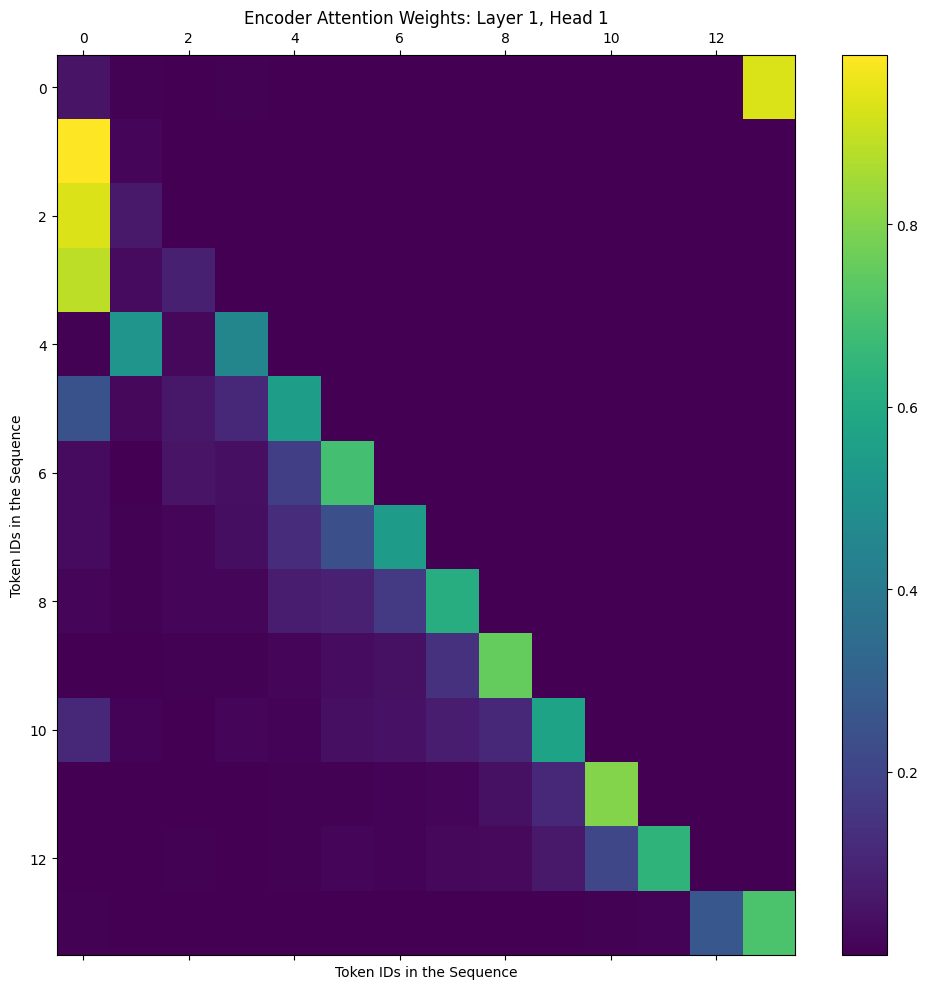

In [35]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch
import matplotlib.pyplot as plt

# Function to plot attention weights
def plot_attention(attention, ax, title=""):
    im = ax.matshow(attention, cmap='viridis', aspect='auto')
    ax.set_title(title)
    ax.set_xlabel('Token IDs in the Sequence')
    ax.set_ylabel('Token IDs in the Sequence')
    return im

# Initialize the model and tokenizer
model_name = 't5-small'
model = T5ForConditionalGeneration.from_pretrained(model_name, return_dict=True)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Prepare the input text
input_text = "translate English to French: Attention mechanisms have revolutionized NLP."
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Translate the text
# Note: Adjust generate() parameters as needed
output = model.generate(input_ids, max_length=50, early_stopping=True, return_dict_in_generate=True, output_attentions=True)

# Decode the translated sequence
translated_text = tokenizer.decode(output.sequences[0], skip_special_tokens=True)
print(f"Translated Text: {translated_text}")

# Visualizing the first layer's encoder attention weights for the first token
encoder_attention_weights = output.encoder_attentions  # List of tensors for each layer

# Select the attention weights for visualization
# Here, we visualize the first layer's weights ([0]) for the first batch item ([0]).
attention_weights_to_plot = encoder_attention_weights[0][0].detach().numpy()

# Selecting the attention weights of the first head for visualization
first_head_attention_weights = attention_weights_to_plot[0]

# Plotting the attention weights of the first head
fig, ax = plt.subplots(figsize=(10, 10))
im = plot_attention(first_head_attention_weights, ax, title="Encoder Attention Weights: Layer 1, Head 1")

# Add colorbar to the plot
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

In [33]:
outputs.keys()

odict_keys(['sequences', 'encoder_attentions', 'decoder_attentions', 'cross_attentions', 'past_key_values'])

## Conclusion
This tutorial has covered the theoretical background, implementation details, and visualization techniques for attention mechanisms using PyTorch and Hugging Face's Transformers. Attention mechanisms are a powerful tool in the AI toolkit, enabling models to dynamically focus on relevant parts of the input data, leading to significant improvements in a wide range of tasks.

Remember, the field of NLP and machine learning is rapidly evolving, so staying updated with the latest research and advancements is crucial for pushing the boundaries of what's possible.